<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- **Regression: What features best predict one's income?**
- **Classification: Predict whether or not one is eligible for a 401k.**

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,\
VotingRegressor,BaggingRegressor,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

In [2]:
def grid_and_r_square(mod,X_train,X_test,y_train,y_test,gridsearch = False):
    """This function use to show the r-squared and best parameter (if use of gridsearch)
        Parameters : X  = Dataframe (matrix) of X (train/test)
                     y  = Series (vector) of y (train/tet)
                     mod =  placeholder for the used model
                     gridsearch = True for used of gridsearch
        Return : R-squared, best parameters from gridsearch"""
    print(f'Train score: {mod.score(X_train,y_train)}')
    print(f'Test score: {mod.score(X_test,y_test)}')
    if gridsearch == True:
        print(f'best parameters:{mod.best_params_}')

In [41]:
def regress_metric(y_test,y_pred):
    """This function use to show the regression metrics
        Parameters : y_test  = real y values
                     y_pred  = predicted y values
        Return : RMSE, MAE """
    print(f'RMSE: {metrics.mean_squared_error(y_test,y_pred,squared=False)}')
    print(f'The predicting value is differ from actual value by {metrics.mean_squared_error(y_test,y_pred,squared=False)}')
    print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
    print(f'The average differences between predicting value and actual value is {metrics.mean_absolute_error(y_test,y_pred)}')

In [4]:
def classifier_metrics(mod,X_test,y_test,prediction):
    """This function use to show the classification metrics
        Parameters : mod = placeholder for the used model
                     X_test = Dataframe (matrix) of X (train/test)
                     y_test  = real y values
                     prediction  = predicted y values
        Return : confusion matrix, classification report """
    print(f'Confusion matrix: {plot_confusion_matrix(mod,X_test,y_test)}')
    print(f'Classification report {metrics.classification_report(y_test,prediction)}')
    

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [43]:
df = pd.read_csv('./401ksubs.csv')

In [44]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [7]:
# 1. experience or hours of work time.
# 2. job list

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [8]:
# Because if the race include to be considered whether to give IRA and 401 advertisement or not, mean that model treat
# the person by their race and it shows the unequallity in the society.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [9]:
# The 'incsq' and 'agesq' features. 
# These features are high collinearlity will violate the LINEM assumption and will cause the data leakage.

# Also 'male'and 'fsize', in real life gender and family size should not be criteria for decision about individual income.


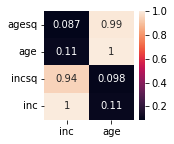

In [10]:
plt.figure(figsize=(2,2))
sns.heatmap(df[['incsq','agesq','inc','age']].corr()[['inc','age']].sort_values(by='inc'),annot=True)
plt.yticks(rotation = 0);

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [ ]:
# income and age tend to be exponential relation with each other. In the real life, every year the income of person
# growing up not linearly, maybe it increased by percent or the adding up of incentive. 

# Or age and fsize have been cleaned outliers.

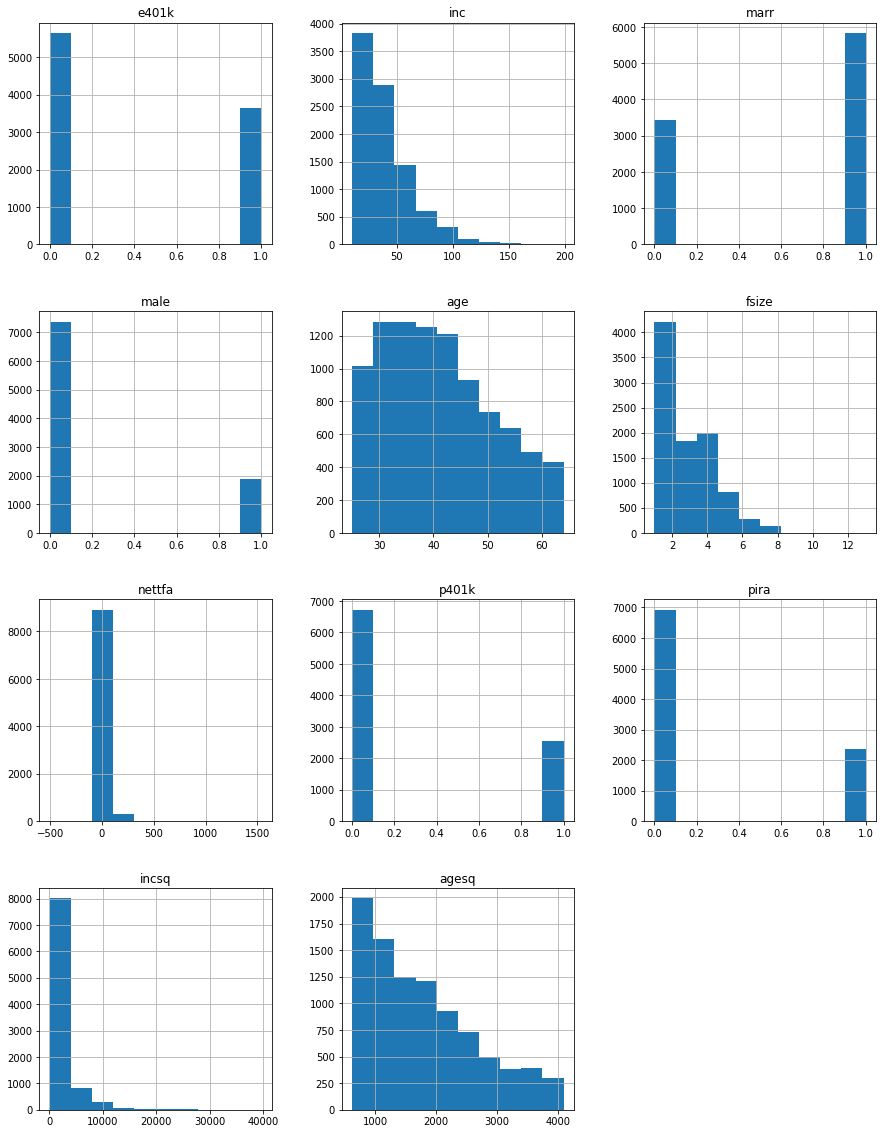

In [77]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [ ]:
# age variable describe as equal to age^2 which is wrong, need to be age
# inc variable describe as equal to inc^2 which is wrong, need to be income

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- linear regression - an appropiate estimator, due to the simple to use as based method to do regression
    - Lasso regularization - an appropiate estimator, that can reduce the cons from OLS by reduce the variance.
    - Ridge regularization - an appropiate estimator, that can reduce the cons from OLS by reduce the variance.
    
- Other regressor that more powerful and could be use.
    - KNeighborsRegressor
    - DecisiontreeRegressor
    - RandomForestRegressor
    -Ensemble method
       - Adaboost regressor
       - GradientBoosting regressor
       - Stacking regressor


##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

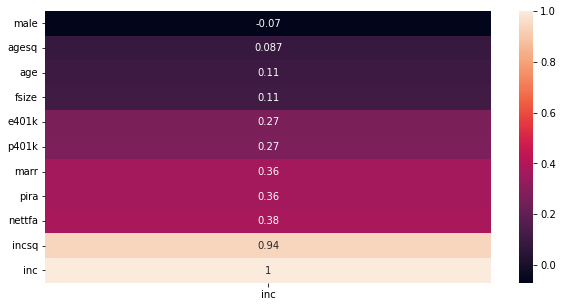

In [84]:
# Plot show the high collinearity, need to remove to avoid data leakage

plt.figure(figsize=(10,5))
sns.heatmap(df.corr()[['inc','']].sort_values(by='inc'),annot=True)
plt.yticks(rotation = 0);

In [45]:
# remove the sq variables (age,inc)
X = df.drop(columns=  ['e401k','p401k','pira','incsq','agesq','inc','fsize'])

y= df['inc']

# split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


In [46]:
# Features of X
X.columns

Index(['marr', 'male', 'age', 'nettfa'], dtype='object')

### Linear regression model

In [47]:
# check shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6956, 4), (2319, 4), (6956,), (2319,))

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [49]:
grid_and_r_square(lr,X_train,X_test,y_train,y_test)

Train score: 0.27001793072702973
Test score: 0.22367467220909265


### KNN 

In [50]:
# Pipeline for knn
knn_pipe = Pipeline([('ss',StandardScaler()),('knn',KNeighborsRegressor(n_jobs=-1))])

# set parameters for KNN
knn_param = {'knn__n_neighbors': np.arange(5,51),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2]}

# Gridsearch for KNN
grid_knn = GridSearchCV(knn_pipe,param_grid=knn_param,cv = 5,verbose=1)

# Fit
grid_knn.fit(X_train,y_train)


# Predict
grid_knn_pred = grid_knn.predict(X_test)

Fitting 5 folds for each of 184 candidates, totalling 920 fits


In [51]:
grid_and_r_square(grid_knn,X_train,X_test,y_train,y_test,gridsearch = True)

Train score: 0.403904300704532
Test score: 0.3780502847206334
best parameters:{'knn__n_neighbors': 40, 'knn__p': 2, 'knn__weights': 'uniform'}


## Decision Tree

In [52]:
tree = DecisionTreeRegressor(random_state=42)

tree_param = { 'splitter':['best',"random"],
    'max_depth':[3,5,7,9,11,13],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[1,3,5,7,9],
    'max_features':[None,'auto','sqrt','log2']
}


grid_tree = GridSearchCV(tree,param_grid=tree_param,cv=5,verbose=1)
grid_tree.fit(X_train,y_train)
grid_tree_pred = grid_tree.predict(X_test)
# tree.fit(X_train,y_train)
# tree_pred = tree.predict(X_test)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


In [53]:
grid_and_r_square(grid_tree,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.420867291693667
Test score: 0.37635985996723764
best parameters:{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


## Bagging

In [54]:
bag = BaggingRegressor(random_state=42)

bag_param = {'n_estimators':[100,110,120,125],
    'max_samples':[40,45,50,55],
    'max_features':[1,2,3,4,5],
    'bootstrap':[True,False]}

grid_bag = GridSearchCV(bag,param_grid=bag_param,cv=5,verbose= 1)
grid_bag.fit(X_train,y_train)
grid_bag_pred = grid_bag.predict(X_test)


# bag.fit(X_train,y_train)
# bag_pred = bag.predict(X_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [55]:
grid_and_r_square(grid_bag,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.39444798227518907
Test score: 0.37432797013674657
best parameters:{'bootstrap': False, 'max_features': 4, 'max_samples': 55, 'n_estimators': 120}


## Random Forest

In [56]:
rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train,y_train)
# rf_pred = rf.predict(X_test)

rf_param = {'n_estimators':[100,125,150,200],
    'max_depth':[5,7,9,11],
    'max_features':[3,5,7,9]}

grid_rf = GridSearchCV(rf,param_grid=rf_param,cv=5,verbose=1)
grid_rf.fit(X_train,y_train)
grid_rf_pred = grid_rf.predict(X_test)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [57]:
grid_and_r_square(grid_rf,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.4344253672625782
Test score: 0.3916750354234231
best parameters:{'max_depth': 5, 'max_features': 3, 'n_estimators': 150}


## Adaboostregressor

In [58]:
ada = AdaBoostRegressor(random_state=42)

# ada.fit(X_train,y_train)
# ada_pred = ada.predict(X_test)
ada_param = {'n_estimators':[5,10,25,50,75],
    'learning_rate':[0.05,0.1,0.3,0.5]}

grid_ada = GridSearchCV(ada,param_grid=ada_param,cv=5,verbose=1)
grid_ada.fit(X_train,y_train)
grid_ada_pred = grid_ada.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [59]:
grid_and_r_square(grid_ada,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.36496092678982883
Test score: 0.3249580492804687
best parameters:{'learning_rate': 0.3, 'n_estimators': 5}


##### 9. What is bootstrapping?

- bootstrapping is the process of resampling the data by allowing the replacement and modelling on each sample. Then average all of answer in the end. Same as the concept of 'wisdom of crowd'

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

- Decisiontree is like the slitting of probability of feature 
- Bagged decision trees is like the  reworking on decision tree but with resampling the data to create the different style of tree and combined for the result, using the concept of 'wisdom of crowd'.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

- Random forest and bagged decision trees both working on the familiar fundamentals. But the difference between  Random forests and bagged decision trees is on how features are selected. The Randomforest is creating the tree by selecting features by sqrt(all_features), but bagged decision tree will select all of the features to create each tree.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

- The random forest is better in term of how the algorithm select the features to create new trees. Randomforest would decrease the collinearity in each tree, and mitigate the variance. While bagged decision tree only resampling the subset of data to create new trees with all the same featurs in each tree.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [60]:
# Linear Regression
regress_metric(y_test,lr_pred)

RMSE: 21.514265197040356
The predicting value is differ from actual value by 21.514265197040356
MAE: 15.378081641735202
The average differences between predicting value and actual value is 15.378081641735202


In [61]:
lr_train_pred = lr.predict(X_train)
regress_metric(y_train,lr_train_pred)

RMSE: 20.48656496549327
The predicting value is differ from actual value by 20.48656496549327
MAE: 14.975372425441968
The average differences between predicting value and actual value is 14.975372425441968


---

In [62]:
# KNN
regress_metric(y_test,grid_knn_pred)

RMSE: 19.25671827222593
The predicting value is differ from actual value by 19.25671827222593
MAE: 13.550284422164726
The average differences between predicting value and actual value is 13.550284422164726


In [63]:
knn_train_pred = grid_knn.predict(X_train)
regress_metric(y_train,knn_train_pred)

RMSE: 18.512754554131472
The predicting value is differ from actual value by 18.512754554131472
MAE: 13.313556828637147
The average differences between predicting value and actual value is 13.313556828637147


---

In [64]:
# Decision tree
regress_metric(y_test,grid_tree_pred)

RMSE: 19.282869859557543
The predicting value is differ from actual value by 19.282869859557543
MAE: 13.7278840101182
The average differences between predicting value and actual value is 13.7278840101182


In [65]:
tree_train_pred = grid_tree.predict(X_train)
regress_metric(y_train,tree_train_pred)

RMSE: 18.24744636651534
The predicting value is differ from actual value by 18.24744636651534
MAE: 13.246269983571027
The average differences between predicting value and actual value is 13.246269983571027


---

In [66]:
# Bagging
regress_metric(y_test,grid_bag_pred)

RMSE: 19.314257195606093
The predicting value is differ from actual value by 19.314257195606093
MAE: 13.941820493747302
The average differences between predicting value and actual value is 13.941820493747302


In [67]:
bag_train_pred = grid_bag.predict(X_train)
regress_metric(y_train,bag_train_pred)

RMSE: 18.6590177027721
The predicting value is differ from actual value by 18.6590177027721
MAE: 13.52429422021756
The average differences between predicting value and actual value is 13.52429422021756


---

In [69]:
# Random forest
regress_metric(y_test,grid_rf_pred)

RMSE: 19.044626499471573
The predicting value is differ from actual value by 19.044626499471573
MAE: 13.589041109616534
The average differences between predicting value and actual value is 13.589041109616534


In [71]:
rd_train_pred = grid_rf.predict(X_train)
regress_metric(y_train,rd_train_pred)

RMSE: 18.032585915359892
The predicting value is differ from actual value by 18.032585915359892
MAE: 13.138227319824432
The average differences between predicting value and actual value is 13.138227319824432


---

In [72]:
# Adaboost
regress_metric(y_test,grid_ada_pred)

RMSE: 20.06180577437183
The predicting value is differ from actual value by 20.06180577437183
MAE: 14.690459722758662
The average differences between predicting value and actual value is 14.690459722758662


In [73]:
ada_train_pred = grid_ada.predict(X_train)
regress_metric(y_train,ada_train_pred)

RMSE: 19.107913774180748
The predicting value is differ from actual value by 19.107913774180748
MAE: 14.193607499438503
The average differences between predicting value and actual value is 14.193607499438503


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [ ]:
# All model are seem slightly overfitted. The bagging is the the lowest overfitted model because 
# the lowest of difference between RMSE of training set and testing set. 

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [ ]:
# I will pick random forest model. Since the low enough of RMSE which mean the closet to the actual value. 
# Also the differences between training and testing of RMSE in each model are not significantly different.
# In addition, the testing score of randomforest is the highest among all of model. 
# This mean that this model working the best on unseen data.


##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [ ]:
# 1.Adding more real data
# 2.Finding interaction term
# 3.Using Regularization

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [11]:
X = df.drop(columns = 'e401k')
y = df['e401k']

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

Logistic Regression:  An appropriate tactic, especially since its coefficients can be interpreted.
KNearest Neighbors:  hard to interpret the coefficient. Nevertheless it can be used for Classification purposes.
Decision Trees:  An appropriate tactic, as it can be used for Classification purposes due to  easy to set up, no assumption to agonize over, easy to visualize, easier to break down and explain than some other algorithms.

Bagged Decision Trees:  An appropriate tactic, as it can be used for Classification purposes also use the concept of wisdom of the crowd' can be better at predicting than decision tree.

Random Forest:  An appropriate tactic, as it can be used for Classification purposes and resampling like bagging but also the features. Which will reduce the correlation between tree, mitigate variance.




##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [12]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6956, 10), (2319, 10), (6956,), (2319,))

In [13]:
y_test.value_counts(normalize=True)

0    0.613195
1    0.386805
Name: e401k, dtype: float64

In [14]:
# Logistic Reg

pipe_logleg = Pipeline([('ss',StandardScaler()),('logreg',LogisticRegression(random_state=42))])

logreg_param = { 'logreg__penalty':['l1','l2'],
    'logreg__C':[1,3,5,7,9,11],
    'logreg__solver':['lbfgs' 'sag', 'saga'],
    'logreg__max_iter':[100,150,200]}

grid_logleg = GridSearchCV(pipe_logleg,param_grid=logreg_param,cv=5,verbose=1)
grid_logleg.fit(X_train,y_train)
grid_logleg_pred  = grid_logleg.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [15]:
grid_and_r_square(grid_logleg,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.8834100057504313
Test score: 0.8861578266494179
best parameters:{'logreg__C': 1, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb8714b6730>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



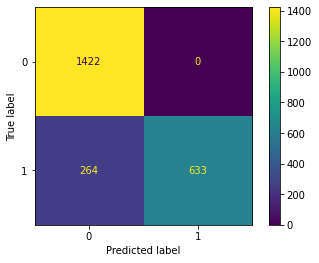

In [16]:
classifier_metrics(grid_logleg,X_test,y_test,grid_logleg_pred)

In [17]:
# KNN
knn_pipe = Pipeline([('ss',StandardScaler()),('knn',KNeighborsClassifier())])

# set parameters for KNN
knn_param = {'knn__n_neighbors': np.arange(5,31),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2],
        'knn__leaf_size':[30,40,50] }

# Gridsearch for KNN
grid_knn = GridSearchCV(knn_pipe,param_grid=knn_param,cv = 5,verbose=1)
grid_knn.fit(X_train,y_train)
grid_knn_pred = grid_knn.predict(X_test)

Fitting 5 folds for each of 312 candidates, totalling 1560 fits


In [18]:
grid_and_r_square(grid_knn,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.8832662449683726
Test score: 0.8852953859422165
best parameters:{'knn__leaf_size': 30, 'knn__n_neighbors': 24, 'knn__p': 1, 'knn__weights': 'uniform'}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb875c9d0a0>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



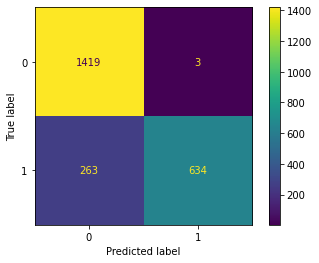

In [19]:
classifier_metrics(grid_knn,X_test,y_test,grid_knn_pred)

In [20]:
# Decisiontree
tree = DecisionTreeClassifier(random_state=42)

tree_param = { 'splitter':['best',"random"],
    'max_depth':[3,5,7,9,11,13],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[1,3,5,7,9],
    'max_features':[None,'auto','sqrt','log2']
}


grid_tree = GridSearchCV(tree,param_grid=tree_param,cv=5,verbose=1)
grid_tree.fit(X_train,y_train)
grid_tree_pred = grid_tree.predict(X_test)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


In [21]:
grid_and_r_square(grid_tree,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.8847038527889591
Test score: 0.8848641655886158
best parameters:{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb87584c8e0>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1422
           1       0.99      0.71      0.83       897

    accuracy                           0.88      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.88      0.88      2319



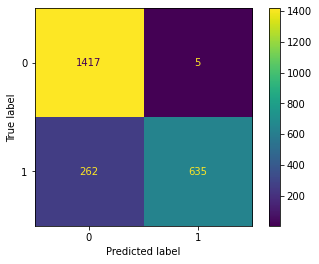

In [22]:
classifier_metrics(grid_tree,X_test,y_test,grid_tree_pred)

In [23]:
# Bagging
bag = BaggingClassifier(random_state=42)

bag_param = {'n_estimators':[10,20,30,40],
    'max_samples':[40,45,50,55],
    'max_features':[1,2,3,4,5],
    'bootstrap':[True,False]}

grid_bag = GridSearchCV(bag,param_grid=bag_param,cv=5,verbose= 1)
grid_bag.fit(X_train,y_train)
grid_bag_pred = grid_bag.predict(X_test)



Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [24]:
grid_and_r_square(grid_bag,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.882691201840138
Test score: 0.8865890470030185
best parameters:{'bootstrap': False, 'max_features': 4, 'max_samples': 55, 'n_estimators': 40}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb8759150a0>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



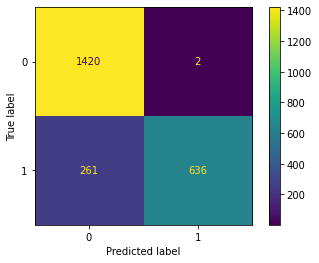

In [25]:
classifier_metrics(grid_bag,X_test,y_test,grid_bag_pred)

In [26]:
# RandomForest
rf = RandomForestClassifier(random_state=42)

rf_param = {'n_estimators':[100,125,150,200],
    'max_depth':[5,7,9,11],
    'max_features':[3,5,7,9]}

grid_rf = GridSearchCV(rf,param_grid=rf_param,cv=5,verbose=1)
grid_rf.fit(X_train,y_train)
grid_rf_pred = grid_rf.predict(X_test)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [27]:
grid_and_r_square(grid_rf,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.8834100057504313
Test score: 0.8861578266494179
best parameters:{'max_depth': 5, 'max_features': 3, 'n_estimators': 100}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb8761f99a0>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



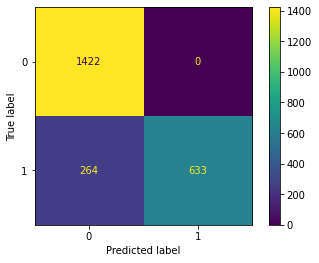

In [28]:
classifier_metrics(grid_rf,X_test,y_test,grid_rf_pred)

In [29]:
# Adaboost
ada = AdaBoostClassifier(random_state=42)

# ada.fit(X_train,y_train)
# ada_pred = ada.predict(X_test)
ada_param = {'n_estimators':[5,10,25,50,75],
    'learning_rate':[0.1,0.3,0.5]}

grid_ada = GridSearchCV(ada,param_grid=ada_param,cv=5,verbose=1)
grid_ada.fit(X_train,y_train)
grid_ada_pred = grid_ada.predict(X_test)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [30]:
grid_and_r_square(grid_ada,X_train,X_test,y_train,y_test,gridsearch=True)

Train score: 0.8834100057504313
Test score: 0.8861578266494179
best parameters:{'learning_rate': 0.1, 'n_estimators': 5}


Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb8760f9b50>
Classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



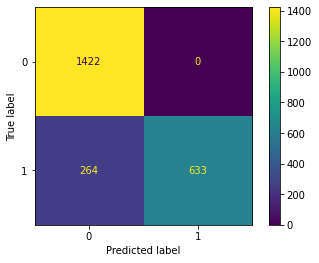

In [31]:
classifier_metrics(grid_ada,X_test,y_test,grid_ada_pred)

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [32]:
# False negative is people who actually get 401(k), but the prediction show that they are not suitable. 

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [ ]:
# False negative is more impact to the company. 
# The employer who decide fail on giving someone 401K will lost their money before the condition were met.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [ ]:
# Recall, because recall is tp/(tp+fn). The less of fn, the more of recall score.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [ ]:
# Precision is How much correct of positive case we catch? tp /(tp+fp)
# However Recall is How much of predicting correct on positive case over all of positive case tp/(tp+fn)

# There is a link between two metric which is the different divider  - fp & fn, which are the component in F1 score.

# So here is F-1 score come to the play, it will keeps the balance between precision and recall.
# if there is perfectly balanced scenario of fn an fp, F1 score will tend toward to 1.But if there is imbalanced between
# recall and precision, whether due to imbalanced classes, etc. it will tend the F1- score toward zero.
 

In [33]:
y_test.value_counts(normalize=True)
# slightly imbalanced classes

0    0.613195
1    0.386805
Name: e401k, dtype: float64

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [34]:
def f1_diff(y_train,y_test,train_pred,test_pred):
    print(f'Train:{metrics.classification_report(y_train,train_pred)}')
    print(f'Test :{metrics.classification_report(y_test,test_pred)}')

In [35]:
# logistic
logleg_train = grid_logleg.predict(X_train)
f1_diff(y_train,y_test,logleg_train,grid_logleg_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       1.00      0.70      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



In [36]:
# KNN
knn_train = grid_knn.predict(X_train)
f1_diff(y_train,y_test,knn_train,grid_knn_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       1.00      0.71      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



In [37]:
# tree
tree_train = grid_tree.predict(X_train)
f1_diff(y_train,y_test,tree_train,grid_tree_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       1.00      0.71      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1422
           1       0.99      0.71      0.83       897

    accuracy                           0.88      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.88      0.88      2319



In [38]:
# Bag
bag_train = grid_bag.predict(X_train)
f1_diff(y_train,y_test,bag_train,grid_bag_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       0.99      0.71      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



In [39]:
# randomforest
rf_train = grid_rf.predict(X_train)
f1_diff(y_train,y_test,rf_train,grid_rf_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       1.00      0.70      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



In [40]:
# ADA
ada_train = grid_ada.predict(X_train)
f1_diff(y_train,y_test,ada_train,grid_ada_pred)

Train:              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4216
           1       1.00      0.70      0.83      2740

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956

Test :              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1422
           1       1.00      0.71      0.83       897

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [ ]:
# There is no overfitting evidence in all of the models.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [ ]:
# All of the model give the same F1-score . So, I would go with logistic regression, because the ability of interpretable. 
# logistic regression is parametic model that has coefficient to interpret

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [ ]:
# 1. make the data more balanced to predict well, as can see from recall with 80% correct on eligible 401K 
# by gathering data or SMOTE
# 2. use more power ful estimator , voting classifier, gradient boosting ,etc.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

- Regression : The Random forest model is the great estimator in this scenario that give the prediction incomes far from the actual incomes only 18.03 dollars, but there is evidence of slightly overfitting in this model. Thus, this estimator may not work great if the data changed or adding features.


- Classification : All models give the same f1 score. So, the criteria of choosing is on how easy to explain things by using that model. Thus, logistic regression seem to be the great estimator for predicting this case and present to the employers. Nevertheless, there will be some challenge on tuning hyperparameter that could improve the accuracy and could lead to distinguish the best model rather than this answer.